In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from resnet import ResNetBackbone
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# Configurar el dispositivo para usar GPU si está disponible
device = tf.config.experimental.list_physical_devices('GPU')
if device:
    try:
        tf.config.experimental.set_memory_growth(device[0], True)
    except RuntimeError as e:
        print(e)

In [11]:
def visualize_predictions(model, images, num_images=5):
    predictions = model.predict(images[:num_images])
    for i in range(num_images):
        image = images[i]
        predicted_keypoints = predictions[i].reshape(-1, 2)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Mostrar la imagen
        axes[0].imshow(image)
        axes[0].axis('on')
        axes[0].set_title('Imagen')

        # Mostrar los puntos clave predichos sin la imagen de fondo
        axes[1].scatter(predicted_keypoints[:, 0] * image.shape[1], predicted_keypoints[:, 1] * image.shape[0], c='b', marker='o')
        axes[1].set_title('Puntos Predichos')
        axes[1].axis('equal')
        axes[1].invert_yaxis()
        axes[1].axis('on')

        plt.show()

In [12]:
test_images=np.load('test_images.npy')

In [13]:
# Guardar el modelo en el formato SavedModel
model = tf.keras.models.load_model('model-resnet-epoch40-Arq2-RetinaFace_early_preprocess')

1/1 [==============================] - 1s 1s/step


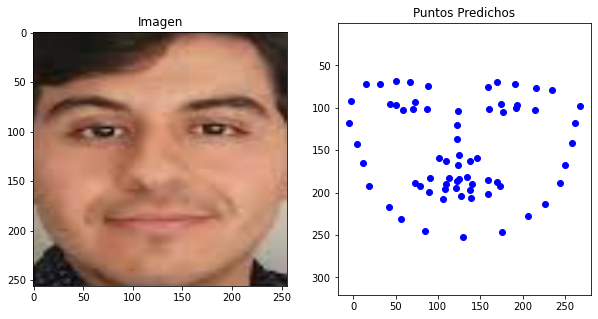

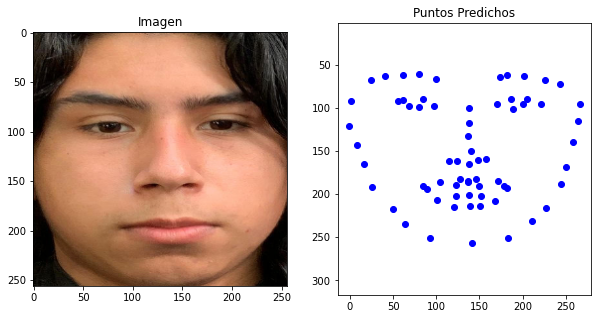

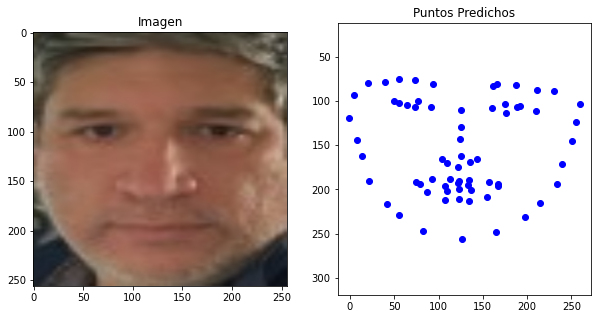

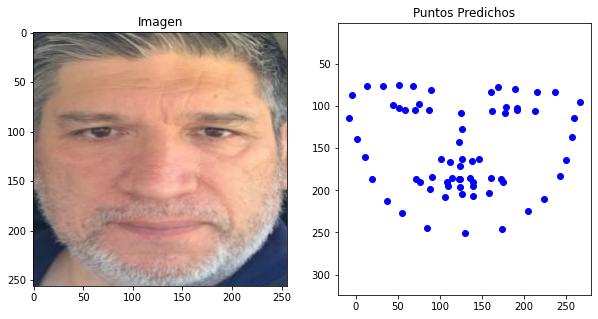

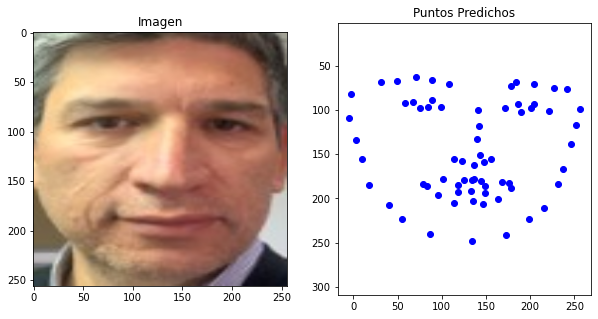

In [14]:
visualize_predictions(model, test_images, num_images=5)